In [1]:
import pandas as pd 
import numpy as np 

In [2]:
crime = pd.read_csv(r"C:\Users\Khalil Gibran\Downloads\crime.tsv", sep='\t')
iucr = pd.read_csv("IUCR.tsv" , sep='\t')
comunidade = pd.read_csv("Community_Area.tsv" , sep='\t')

In [3]:
crime.columns 

Index(['crime_id', 'case_number', 'date', 'block', 'iucr',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_Code', 'latitude', 'longitude'],
      dtype='object')

In [4]:
crime.drop(columns = ['latitude', 'longitude'] , axis = 1 , inplace = True ) #remoção de colunas que não serão usadas 



In [5]:
crime.columns 

Index(['crime_id', 'case_number', 'date', 'block', 'iucr',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_Code'],
      dtype='object')

 ### Data cleaning  

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269346 entries, 0 to 269345
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   crime_id              269346 non-null  int64 
 1   case_number           269346 non-null  object
 2   date                  269346 non-null  object
 3   block                 269346 non-null  object
 4   iucr                  269346 non-null  object
 5   location_description  268163 non-null  object
 6   arrest                269346 non-null  bool  
 7   domestic              269346 non-null  bool  
 8   beat                  269346 non-null  int64 
 9   district              269346 non-null  int64 
 10  ward                  269346 non-null  int64 
 11  community_area        269346 non-null  int64 
 12  fbi_Code              269346 non-null  object
dtypes: bool(2), int64(5), object(6)
memory usage: 23.1+ MB


- convertendo a coluna "date" para datetime, para posteriomente extrar informações como dias da semana, hora, mês ou qualquer informação relacionada a tempo. 

In [7]:
crime.date = pd.to_datetime(crime.date) 
                                        


In [8]:
crime.insert( 3, 'Hour', crime.date.dt.hour ) #criando a tabela a tabela Hora!


In [9]:
crime.insert( 4,'month' , crime.date.dt.month)

In [10]:
crime.insert( 5, 'weekday_number' , crime.date.dt.weekday)

In [11]:
dias_da_semana = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [12]:
crime['semana'] = crime['weekday_number'].map(dias_da_semana)

In [13]:
crime.columns

Index(['crime_id', 'case_number', 'date', 'Hour', 'month', 'weekday_number',
       'block', 'iucr', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_Code', 'semana'],
      dtype='object')

In [14]:
crime.drop(columns = ['beat', 'ward', 'fbi_Code' , 'weekday_number' ], axis = 1,  inplace = True) #remoção de colunas que não serão usadas. 

In [15]:
crime.shape

(269346, 13)

In [16]:
crime.duplicated().sum() #verificando se há dados duplicados. 

0

In [17]:
crime.describe(include = 'object')

,case_number,block,iucr,location_description,semana
count,269346,269346,269346,268163,269346
unique,269309,27901,326,139,7
top,HZ140230,001XX N STATE ST,486,STREET,Friday
freq,6,819,24750,60948,41326


In [18]:
null = crime.location_description.isnull()

In [19]:
null.sum()

1183

In [20]:
crime[null].head(5) #valores nulos na tabela

,crime_id,case_number,date,Hour,month,block,iucr,location_description,arrest,domestic,district,community_area,semana
9,11244431,JB169544,2016-03-01 07:40:00,7,3,021XX N KARLOV AVE,1153,NaN,False,False,25,20,Tuesday
12,11230877,JB152189,2016-03-15 13:25:00,13,3,020XX W CORTLAND ST,1154,NaN,False,False,14,22,Tuesday
14,11230884,JB152020,2016-04-20 13:10:00,13,4,015XX E 69TH ST,1153,NaN,False,False,3,43,Wednesday
30,11235008,JB157932,2016-10-01 09:15:00,9,10,040XX W 21ST PL,1153,NaN,False,False,10,29,Saturday
42,11240500,JB165087,2016-06-17 18:20:00,18,6,047XX N MARIA CT,1153,NaN,False,False,16,76,Friday


### mesclando as tabelas 


In [21]:
crime = pd.merge( crime, iucr , on= 'iucr')

In [22]:
crime.columns 

Index(['crime_id', 'case_number', 'date', 'Hour', 'month', 'block', 'iucr',
       'location_description', 'arrest', 'domestic', 'district',
       'community_area', 'semana', 'primary_description',
       'secondary_description', 'index_code'],
      dtype='object')

In [23]:
del crime['index_code']

In [24]:
#organizando as colunas 

In [25]:
crime[['crime_id', 'case_number', 'date', 'Hour', 'month', 'semana', 'block', 'iucr','primary_description', 'secondary_description',
       'location_description', 'arrest', 'domestic', 'district',
       'community_area',
       ]].columns

Index(['crime_id', 'case_number', 'date', 'Hour', 'month', 'semana', 'block',
       'iucr', 'primary_description', 'secondary_description',
       'location_description', 'arrest', 'domestic', 'district',
       'community_area'],
      dtype='object')

In [26]:
comunidade.head()

,area_number,community_area_name,side
0,1,Rogers Park,Far North Side
1,2,West Ridge,Far North Side
2,3,Uptown,Far North Side
3,4,Lincoln Square,Far North Side
4,5,North Center,North Side


In [27]:
comunidade.area_number.nunique()


77

In [28]:
crime.community_area.nunique()

77

In [29]:
crime.rename(columns = {'community_area': 'area_number'}, inplace = True)

In [30]:
crime = pd.merge( crime, comunidade, on='area_number' )

In [31]:
crime.columns

Index(['crime_id', 'case_number', 'date', 'Hour', 'month', 'block', 'iucr',
       'location_description', 'arrest', 'domestic', 'district', 'area_number',
       'semana', 'primary_description', 'secondary_description',
       'community_area_name', 'side'],
      dtype='object')

#### As 5 áreas comunitárias (community_area_name) com o maior número de ocorrências de crimes são:

In [32]:
crime.groupby('community_area_name').count()['crime_id'].sort_values(ascending=False)[:5]

community_area_name
Austin             16771
Near North Side    10567
Near West Side      9475
Loop                9027
North Lawndale      8812
Name: crime_id, dtype: int64

#### As 5 áreas(community_area_name) com o menor número de ocorrências: 

In [33]:
crime.groupby('community_area_name').count()['crime_id'].sort_values(ascending=False).tail(5)

community_area_name
Mount Greenwood    613
Hegewisch          586
Forest Glen        573
Burnside           400
Edison Park        309
Name: crime_id, dtype: int64

#### - Quais são as ocorrências mais comuns na área com menor número de denúncias na cidade de Chicago?

In [115]:
crime[crime.community_area_name.str.contains('Edison Park')][['iucr','primary_description', 'secondary_description' ]].value_counts()[:5]

iucr  primary_description  secondary_description  
820   THEFT                $500 AND UNDER             33
1320  CRIMINAL DAMAGE      TO VEHICLE                 26
560   ASSAULT              SIMPLE                     22
486   BATTERY              DOMESTIC BATTERY SIMPLE    20
1310  CRIMINAL DAMAGE      TO PROPERTY                19
dtype: int64

#### - As 10 combinações mais comuns de "primary_description" e "secondary_description" de crimes, juntamente com o número de ocorrências para cada combinação.

In [34]:
crime[['primary_description', 'secondary_description']].value_counts()[:10]

primary_description  secondary_description  
BATTERY              DOMESTIC BATTERY SIMPLE    24750
THEFT                $500 AND UNDER             24292
BATTERY              SIMPLE                     16051
CRIMINAL DAMAGE      TO VEHICLE                 15280
THEFT                OVER $500                  15216
CRIMINAL DAMAGE      TO PROPERTY                14145
ASSAULT              SIMPLE                     12172
THEFT                FROM BUILDING              10011
MOTOR VEHICLE THEFT  AUTOMOBILE                  9511
THEFT                RETAIL THEFT                8986
dtype: int64

#### - Qual é o dia da semana com o maior número de registros de denúncias?

In [35]:
crime[crime.iucr == '486']['semana'].value_counts()

Sunday       4384
Saturday     4060
Monday       3387
Friday       3376
Thursday     3247
Tuesday      3149
Wednesday    3147
Name: semana, dtype: int64

#### - Qual é o tipo de denúncia mais frequente aos domingos?

In [119]:
crime[crime.semana.str.contains('Sunday')][['iucr',  'primary_description' , 'secondary_description']].value_counts()[:2]

iucr  primary_description  secondary_description  
486   BATTERY              DOMESTIC BATTERY SIMPLE    4384
820   THEFT                $500 AND UNDER             3275
dtype: int64

#### - Os 5 delitos mais frequentes nas RUAS de Chicago são:

In [37]:
crime[crime.location_description == 'STREET'][['primary_description','secondary_description']].value_counts()[:5]

primary_description  secondary_description
CRIMINAL DAMAGE      TO VEHICLE               10809
THEFT                $500 AND UNDER            9350
MOTOR VEHICLE THEFT  AUTOMOBILE                7045
THEFT                OVER $500                 5656
BATTERY              SIMPLE                    2505
dtype: int64

#### - um gráfico  que mostra a distribuição das denúncias ao longo do dia (24 horas) ?

<AxesSubplot:xlabel='Hour'>

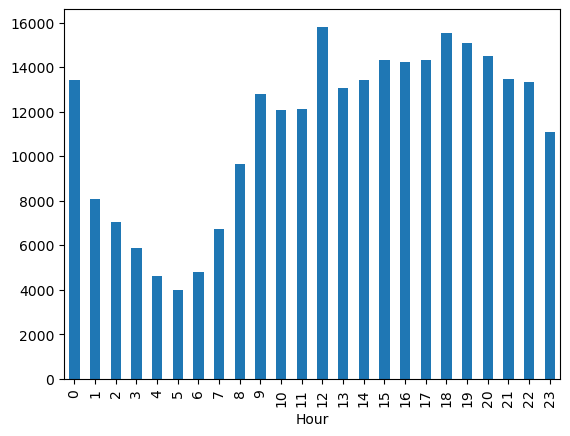

In [38]:
crime.groupby('Hour').count()['crime_id'].plot(kind ='bar')

#### - Quais os tipos ocorrências em periodos diferentes do dia (manhã, tarde, noite)?

- 00:00 a 6h:

In [102]:
crime[crime.Hour.between(0 , 6)][['iucr', 'primary_description','secondary_description']].value_counts()[:5].to_frame()

,,,0
iucr,primary_description,secondary_description,
486,BATTERY,DOMESTIC BATTERY SIMPLE,6126
820,THEFT,$500 AND UNDER,3971
1310,CRIMINAL DAMAGE,TO PROPERTY,3366
1320,CRIMINAL DAMAGE,TO VEHICLE,3324
460,BATTERY,SIMPLE,3180


- 6h a 12h:

In [116]:
crime[crime.Hour.between(6 , 12)][['iucr', 'primary_description','secondary_description']].value_counts()[:5].to_frame()

,,,0
iucr,primary_description,secondary_description,
820,THEFT,$500 AND UNDER,6571
486,BATTERY,DOMESTIC BATTERY SIMPLE,6134
810,THEFT,OVER $500,4201
1310,CRIMINAL DAMAGE,TO PROPERTY,3573
560,ASSAULT,SIMPLE,3556


- 12h a 18h:

In [120]:
crime[crime.Hour.between(12 , 18)][['iucr', 'primary_description','secondary_description']].value_counts()[:5].to_frame() 

,,,0
iucr,primary_description,secondary_description,
820,THEFT,$500 AND UNDER,9192
486,BATTERY,DOMESTIC BATTERY SIMPLE,7285
460,BATTERY,SIMPLE,6330
810,THEFT,OVER $500,5885
860,THEFT,RETAIL THEFT,5629


- 18h a 23h:

In [104]:
crime[crime.Hour.between(18, 23)][['iucr', 'primary_description','secondary_description']].value_counts()[:5].to_frame()


,,,0
iucr,primary_description,secondary_description,
486,BATTERY,DOMESTIC BATTERY SIMPLE,7993
820,THEFT,$500 AND UNDER,7947
1320,CRIMINAL DAMAGE,TO VEHICLE,6021
460,BATTERY,SIMPLE,4881
810,THEFT,OVER $500,4876


In [43]:
crime.groupby(['Hour', 'semana']).count()['crime_id'].unstack()

semana,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,2184,1866,2158,2114,1656,1727,1699
1,1123,1020,1625,1629,939,911,847
2,877,798,1532,1619,739,728,733
3,721,649,1256,1423,610,630,581
4,584,560,931,1137,489,487,447
5,554,531,707,776,487,480,472
6,751,733,622,641,678,713,653
7,1090,1048,767,702,1078,1031,1005
8,1549,1513,1076,957,1567,1515,1487
